<a href="https://colab.research.google.com/github/JScottLopez/github-ds/blob/master/TIM_6500_JSLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Conditions Related to COVID-19 Deaths

By: Joseph S. Lopez

TIM-6500 v3: Princples of Data Science

August 1, 2021

In [26]:
#import necessary Python libraries
import pandas as pd

#loaded data from file into pandas dataframe
df = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [27]:
#used describe function for data exploration
df.describe(include = 'all')

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
count,273240,273240,273240,273240,260820,235980.000000,273240,273240,273240,273240,273240,201085,203133,72155
unique,1,19,19,3,2,NaN,54,12,23,23,10,3442,3525,1
top,07/18/2021,01/01/2020,07/17/2021,By Month,"2,020",NaN,Virginia,Circulatory diseases,Cardiac arrhythmia,"F01, F03",25-34,0,0,One or more data cells have counts between 1-9...
freq,273240,37260,37260,235980,161460,NaN,5060,83160,11880,11880,27324,131582,131582,72155
mean,NaN,NaN,NaN,NaN,NaN,5.578947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.233317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#determine data types for each column
df.dtypes

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                   object
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths        object
Number of Mentions     object
Flag                   object
dtype: object

In [29]:
#rename columns for later use
df.rename(columns={'Age Group': 'AgeGroup', 'COVID-19 Deaths': 'CV19_Deaths'}, inplace=True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"1,999","2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"5,293","5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"15,615","16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"39,217","40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [30]:
#Remove commas from CV19_Deaths column
df['CV19_Deaths']=df['CV19_Deaths'].str.replace(',','')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1999,"2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5293,"5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,15615,"16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,39217,"40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27,27,NaN


In [31]:
#Convert column type to float
df['CV19_Deaths'] = df['CV19_Deaths'].astype(float, errors = 'raise')
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443.0,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1999.0,"2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5293.0,"5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,15615.0,"16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,39217.0,"40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69.0,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182.0,182,NaN
273238,07/18/2021,06/01/2021,06/30/2021,By Month,"2,021",6.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,27.0,27,NaN


In [32]:
#retrieve column counts and group by Age Group
df.groupby('AgeGroup').count()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,CV19_Deaths,Number of Mentions,Flag
AgeGroup,,,,,,,,,,,,,
0-24,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,23564,23624,3760
25-34,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,20881,20986,6443
35-44,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,18788,18985,8536
45-54,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,17232,17496,10092
55-64,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,17243,17526,10081
65-74,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,17904,18195,9420
75-84,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,18345,18623,8979
85+,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,18426,18723,8898
All Ages,27324,27324,27324,27324,26082,23598,27324,27324,27324,27324,21505,21778,5819


In [33]:
#drop all null values in CV19_Deaths column
df.dropna(subset = ["CV19_Deaths"], inplace=True)
display(df)

# check for value of 0 in CV_Deaths column and drop rows
index_names = df[df['CV19_Deaths'] == '0'].index
df.drop(index_names, inplace = True)
display(df)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443.0,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1999.0,"2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5293.0,"5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,15615.0,"16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,39217.0,"40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273234,07/18/2021,02/01/2021,02/28/2021,By Month,"2,021",2.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,132.0,132,NaN
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69.0,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182.0,182,NaN


,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
0,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,443.0,462,NaN
1,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1999.0,"2,051",NaN
2,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5293.0,"5,434",NaN
3,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,15615.0,"16,079",NaN
4,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,39217.0,"40,321",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273234,07/18/2021,02/01/2021,02/28/2021,By Month,"2,021",2.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,132.0,132,NaN
273235,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,69.0,69,NaN
273236,07/18/2021,04/01/2021,04/30/2021,By Month,"2,021",4.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,197.0,197,NaN
273237,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,182.0,182,NaN


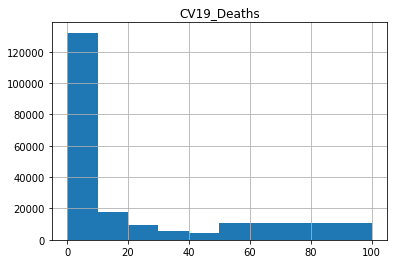

In [40]:
df.hist(column='CV19_Deaths', bins=[0,10,20,30,40,50,100]);

In [ ]:
#remove all non-relevant values from State column
df1 = df[~df.State.str.contains('District of Columbia|New York City|Puerto Rico|United States', regex=True)]
display(df1)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
231,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31,NaN
232,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,73.0,73,NaN
233,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,195.0,197,NaN
234,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,488.0,501,NaN
235,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,957.0,969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268863,07/18/2021,01/01/2021,01/31/2021,By Month,"2,021",1.0,Wyoming,COVID-19,COVID-19,U071,All Ages,99.0,99,NaN
268864,07/18/2021,02/01/2021,02/28/2021,By Month,"2,021",2.0,Wyoming,COVID-19,COVID-19,U071,All Ages,45.0,45,NaN
268865,07/18/2021,03/01/2021,03/31/2021,By Month,"2,021",3.0,Wyoming,COVID-19,COVID-19,U071,All Ages,17.0,17,NaN
268867,07/18/2021,05/01/2021,05/31/2021,By Month,"2,021",5.0,Wyoming,COVID-19,COVID-19,U071,All Ages,23.0,23,NaN


In [ ]:
#remove all non-relevant values from AgeGroup column
df2 = df1[~df1.AgeGroup.str.contains('Not stated|All Ages', regex=True)]
display(df2)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
231,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,30.0,31,NaN
232,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,73.0,73,NaN
233,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,195.0,197,NaN
234,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,488.0,501,NaN
235,07/18/2021,01/01/2020,07/17/2021,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,957.0,969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268822,07/18/2021,10/01/2020,10/31/2020,By Month,"2,020",10.0,Wyoming,COVID-19,COVID-19,U071,85+,30.0,30,NaN
268823,07/18/2021,11/01/2020,11/30/2020,By Month,"2,020",11.0,Wyoming,COVID-19,COVID-19,U071,85+,56.0,56,NaN
268824,07/18/2021,12/01/2020,12/31/2020,By Month,"2,020",12.0,Wyoming,COVID-19,COVID-19,U071,85+,55.0,55,NaN
268825,07/18/2021,01/01/2021,01/31/2021,By Month,"2,021",1.0,Wyoming,COVID-19,COVID-19,U071,85+,33.0,33,NaN


In [ ]:
#remove all non-relevant values from Group column
df3 = df2[~df2.Group.str.contains('By Year|By Total', regex=True)]
display(df3)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,AgeGroup,CV19_Deaths,Number of Mentions,Flag
41630,07/18/2021,01/01/2020,01/31/2020,By Month,"2,020",1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0,NaN
41631,07/18/2021,02/01/2020,02/29/2020,By Month,"2,020",2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0,NaN
41632,07/18/2021,03/01/2020,03/31/2020,By Month,"2,020",3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0,NaN
41633,07/18/2021,04/01/2020,04/30/2020,By Month,"2,020",4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0,NaN
41634,07/18/2021,05/01/2020,05/31/2020,By Month,"2,020",5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268822,07/18/2021,10/01/2020,10/31/2020,By Month,"2,020",10.0,Wyoming,COVID-19,COVID-19,U071,85+,30.0,30,NaN
268823,07/18/2021,11/01/2020,11/30/2020,By Month,"2,020",11.0,Wyoming,COVID-19,COVID-19,U071,85+,56.0,56,NaN
268824,07/18/2021,12/01/2020,12/31/2020,By Month,"2,020",12.0,Wyoming,COVID-19,COVID-19,U071,85+,55.0,55,NaN
268825,07/18/2021,01/01/2021,01/31/2021,By Month,"2,021",1.0,Wyoming,COVID-19,COVID-19,U071,85+,33.0,33,NaN


In [ ]:
df3.dtypes

Data As Of             object
Start Date             object
End Date               object
Group                  object
Year                   object
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
AgeGroup               object
CV19_Deaths           float64
Number of Mentions     object
Flag                   object
dtype: object

In [ ]:

#import numpy as np

def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  return np.where((data > upper_bound) | (data < lower_bound))

for i in outliers_iqr(df3.CV19_Deaths)[0] :
  print(df3[i:i+1])

       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
41698  07/18/2021  12/01/2020  12/31/2020  ...        29.0                 29   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
41699  07/18/2021  01/01/2021  01/31/2021  ...        42.0                 42   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
41712  07/18/2021  07/01/2020  07/31/2020  ...        40.0                 42   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
41713  07/18/2021  08/01/2020  08/28/2020  ...        46.0                 49   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
41716  07/18/2021  11/01/2020  11/30/2020  ...        32.0                 32   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ..

KeyboardInterrupt: ignored

In [ ]:
def outliers_z_score(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)
  z_scores = [(y - mean) / std for y in data]
  return np.where(np.abs(z_scores) > threshold)

print("Outliers using outlierz_z_score")
print("===============================")
for i in outliers_z_score(df3.CV19_Deaths)[0]:
  print(df3[i:i+1])
print()

Streaming output truncated to the last 5000 lines.
59193  07/18/2021  08/01/2020  08/28/2020  ...       361.0                363   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
59197  07/18/2021  12/01/2020  12/31/2020  ...      1068.0              1,079   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
59198  07/18/2021  01/01/2021  01/31/2021  ...      2026.0              2,061   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
59199  07/18/2021  02/01/2021  02/28/2021  ...       961.0                979   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions  Flag
59200  07/18/2021  03/01/2021  03/31/2021  ...       288.0                293   NaN

[1 rows x 14 columns]
       Data As Of  Start Date    End Date  ... CV19_Deaths Number of Mentions 